# __Redes Neurais__
## __Lista III - Conceitos Básicos de Redes Neurais__

__Aluno:__ Tales Araujo dos Santos <br> __Matrícula:__ 374953

Tarefa de __classificação__ sobre o dataset Breast-Cancer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [2]:
columns = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes',
           'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

df = pd.read_csv('breast-cancer.csv', names=columns)

df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
# Replace categorical data
df.replace(to_replace='?', value=np.nan, inplace=True)

df['class'].replace(to_replace='no-recurrence-events', value=0, inplace=True)
df['class'].replace(to_replace='recurrence-events', value=1, inplace=True)

df.replace(to_replace='no', value=0, inplace=True)
df.replace(to_replace='yes', value=1, inplace=True)

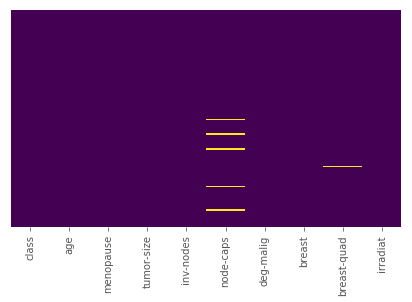

In [4]:
# Graphic visualization of missing values

plt.figure(figsize=(7, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 285
Data columns (total 10 columns):
class          277 non-null int64
age            277 non-null object
menopause      277 non-null object
tumor-size     277 non-null object
inv-nodes      277 non-null object
node-caps      277 non-null float64
deg-malig      277 non-null int64
breast         277 non-null object
breast-quad    277 non-null object
irradiat       277 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 23.8+ KB


In [7]:
df.dtypes

class            int64
age             object
menopause       object
tumor-size      object
inv-nodes       object
node-caps      float64
deg-malig        int64
breast          object
breast-quad     object
irradiat         int64
dtype: object

In [8]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30-39,premeno,30-34,0-2,0.0,3,left,left_low,0
1,0,40-49,premeno,20-24,0-2,0.0,2,right,right_up,0
2,0,40-49,premeno,20-24,0-2,0.0,2,left,left_low,0
3,0,60-69,ge40,15-19,0-2,0.0,2,right,left_up,0
4,0,40-49,premeno,0-4,0-2,0.0,2,right,right_low,0


## __Variable Handling__

In [9]:
# Casting attribute to int values
df['node-caps'] = df['node-caps'].astype(int)

### Age

In [10]:
# Handling 'age' variable with integer values
ages = ["{}0-{}9".format(str(i), str(i)) for i in range(1, 10)]

for i, age in enumerate(ages):
    df.replace(to_replace=age, value=i+1, inplace=True)

### Tumor size

In [11]:
# Since tumor sizes are shown in milimetric ranges, with a format similar to the ages, we can use the average
# value in the current interval.
t_sizes = ["{}-{}".format(str(i), str(i+4)) for i in range(60) if (i%5 == 0)]

t_means = [(i+2) for i in range(60) if (i%5 == 0)]

for size, mean in zip(t_sizes, t_means):
    df.replace(to_replace=size, value=mean, inplace=True)

In [12]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,3,premeno,32,0-2,0,3,left,left_low,0
1,0,4,premeno,22,0-2,0,2,right,right_up,0
2,0,4,premeno,22,0-2,0,2,left,left_low,0
3,0,6,ge40,17,0-2,0,2,right,left_up,0
4,0,4,premeno,2,0-2,0,2,right,right_low,0


### Number of lymph nodes

In [13]:
inv_nodes = ["{}-{}".format(str(x), str(x+2)) for x in range(36) if x%3 == 0]
inv_nodes.append('36-39')

avg_values = [x for x in range(40) if (x-1)%3 == 0]

for inv_node, avg_value in zip(inv_nodes, avg_values):
    df['inv-nodes'].replace(to_replace=inv_node, value=avg_value, inplace=True)

### Breast

In [14]:
df['breast'].replace(to_replace='right', value=1, inplace=True)
df['breast'].replace(to_replace='left', value=2, inplace=True)

### Breast quadrant

In [15]:
quadrants = ["central", "left_up", "right_up", "right_low", "left_low"]

for quadrant, i in zip(quadrants, range(5)):
    df['breast-quad'].replace(to_replace=quadrant, value=i, inplace=True)

### Menopause

In [16]:
meno_types = ["premeno", "ge40", "lt40"]

for meno_type, i in zip(meno_types, range(3)):
    df['menopause'].replace(to_replace=meno_type, value=i, inplace=True)

In [17]:
df.dtypes

class          int64
age            int64
menopause      int64
tumor-size     int64
inv-nodes      int64
node-caps      int64
deg-malig      int64
breast         int64
breast-quad    int64
irradiat       int64
dtype: object

In [18]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,3,0,32,1,0,3,2,4,0
1,0,4,0,22,1,0,2,1,2,0
2,0,4,0,22,1,0,2,2,4,0
3,0,6,1,17,1,0,2,1,1,0
4,0,4,0,2,1,0,2,1,3,0


## __Exploratory Data Analysis__

In [19]:
def describe_table(df):
    table = df.describe()
    table.loc['skew'] = df.skew()
    return table

describe_table(df)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,0.292419,4.642599,0.480144,26.404332,2.505415,0.202166,2.057762,1.523466,2.357401,0.223827
std,0.455697,1.010125,0.535483,10.662258,3.413126,0.402342,0.729989,0.500353,1.461607,0.417562
min,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,22.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000
50%,0.000000,5.000000,0.000000,27.000000,1.000000,0.000000,2.000000,2.000000,2.000000,0.000000
75%,1.000000,5.000000,1.000000,32.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000
max,1.000000,7.000000,2.000000,52.000000,25.000000,1.000000,3.000000,2.000000,4.000000,1.000000
skew,0.917675,0.019817,0.435945,0.057218,3.073500,1.491267,-0.089498,-0.094479,-0.041884,1.332411


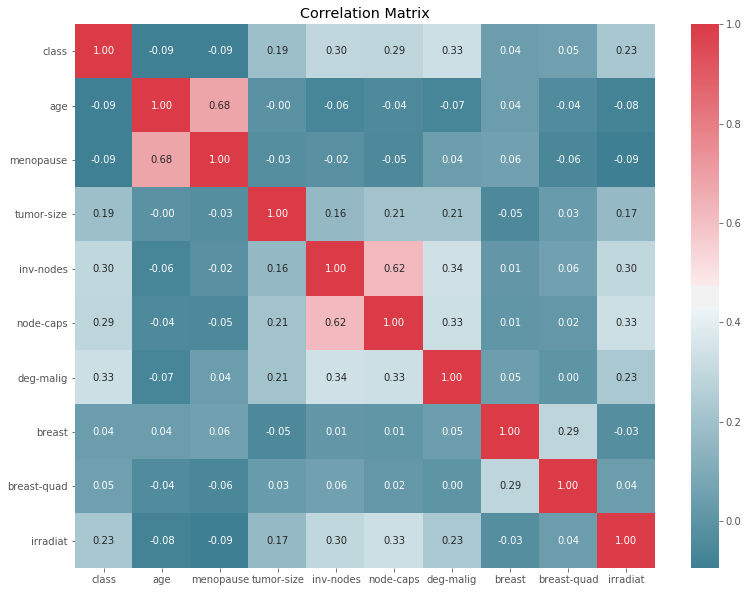

In [20]:
plt.figure(figsize=(13,10))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(method='pearson'), annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [21]:
class MCPerceptron:
    def __init__(self, X, y, leaning_rate=0.3):
        self.n_features = X.shape[0]
        self.X = X
        self.y = y
        self.W = np.zeros(self.n_features + 1)
        self.leaning_rate = leaning_rate

    def thresold(self, x):
        return 1 if (x > 0) else 0

    def output(self):
        return self.thresold(self.W @ self.X)

    def update_weights(self):
        self.W = self.W + (self.leaning_rate * (self.output() - self.y) * self.X)

    def __str__(self):
        return "Input: {}\nOutput: {}\nWeights: {}\nLearning Rate: {}".format(self.X, self.y,
                                                                              self.W, self.leaning_rate)

In [22]:
from sklearn.model_selection import train_test_split

def add_one(X):
    return np.concatenate((np.ones(1), X), axis=0)

In [23]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
m, n = X_train.shape

In [26]:
i = 0

neuron = MCPerceptron(add_one(X_train[i]), y_train[i])

while(i < m):
    neuron.X = add_one(X_train[i])
    neuron.y = y_train[i]
    
    neuron.update_weights()
    i += 1

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 11)

In [ ]:


X_sample = add_one(X_test[0])
X_sample

W @ X_sample